In [91]:
import sys
import librosa as lr
import librosa.display as lrd
import numpy as np

import matplotlib.pyplot as plt
import IPython.display as ipd

%matplotlib inline

sys.path.append("../libs/")
from processing import make_fragments, unmake_fragments, s_to_reim

In [92]:
n_fft = 512
win = n_fft
hop = win // 4

x, sr = lr.load('/data/riccardo_datasets/npr_news/train/newscast230841.wav', sr=None, duration=1, offset=2)
s = lr.stft(x, n_fft=n_fft, hop_length=hop, win_length=win)

print(x.shape)
print(s.shape)

(16000,)
(257, 126)


In [93]:
frag_hop = lr.time_to_frames(0.1, sr=sr, hop_length=hop, n_fft=win)
frag_win = lr.time_to_frames(0.3, sr=sr, hop_length=hop, n_fft=win)
print(frag_hop, frag_win)

frags = np.array(make_fragments(s, frag_hop_len=frag_hop, frag_win_len=frag_win))

# APPLY NOISE TO A FRAG!!!
sh = frags.shape
frags[0] += np.random.randn(sh[1], sh[2])*0.5

print(frags.shape)

10 35
(10, 257, 35)


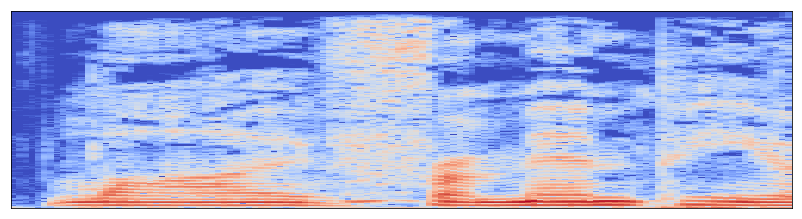

In [94]:
plt.figure(figsize=(14, 8))
plt.subplot(211)
lrd.specshow(lr.amplitude_to_db(np.abs(s)))
ipd.Audio(x, rate=sr)


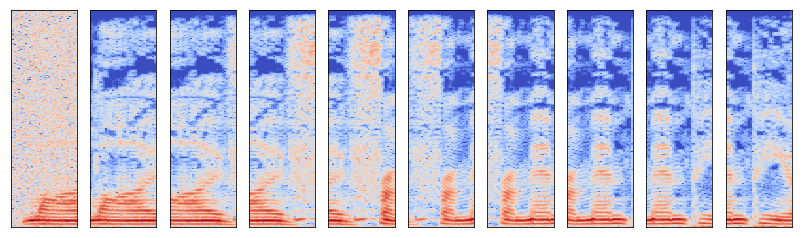

In [95]:
plt.figure(figsize=(14, 4))
n = frags.shape[0]
for i in range(n):
    plt.subplot(1,n,1+i)
    lrd.specshow(lr.amplitude_to_db(np.abs(frags[i])))
    # ipd.Audio(x, rate=sr)

In [96]:
s_sig = unmake_fragments(frags, frag_hop_len=frag_hop, frag_win_len=frag_win)

sig = lr.istft(s_sig, hop_length=hop, win_length=win)

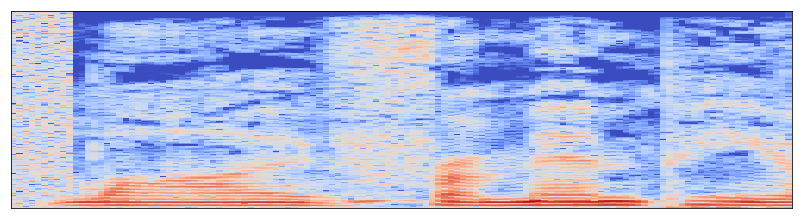

In [97]:
plt.figure(figsize=(14, 8))
plt.subplot(211)
lrd.specshow(lr.amplitude_to_db(np.abs(s_sig)))
ipd.Audio(sig, rate=sr)

In [98]:
# seems like everything works.
# each fragments contributes to the signal with its initial `frag_hop` frames of content 